# Spotify Usage Analysis
I want to find out who I listen to and what their basic background is.
[Medium Article](https://medium.com/@RareLoot/extracting-spotify-data-on-your-favourite-artist-via-python-d58bc92a4330)
[Docs](https://spotipy.readthedocs.io/en/2.9.0/#)
[Examples](https://github.com/plamere/spotipy/tree/master/examples)

In [13]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import sys
import spotipy.util as util
import matplotlib.pyplot as plt
import pprint

Setup Spotify API connection

In [14]:
client_id = "1971694acef8412ba128e98ef15eacca"
client_secret = "9ba2a9f9a0204c76ac94267790d22c2b"
username = "a2la4jzttvnov9au11hwf56z8"
scope = "user-top-read"
redirect_uri = "http://localhost:8080"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

Create security token

In [15]:
token = util.prompt_for_user_token(username,
                           scope,
                           client_id=client_id,
                           client_secret=client_secret,
                           redirect_uri=redirect_uri)

### Get my favourite artists

In [16]:
if token:
    sp = spotipy.Spotify(auth=token)
    sp.trace = False
    ranges = ['short_term', 'medium_term', 'long_term']
    for r in ranges:
        results = sp.current_user_top_artists(time_range=r, limit=50)

### Data Cleaning

In [74]:
name=[]
popularity=[]
genres=[]
followers=[]

for artist in results['items']:
    if len(artist['genres']) > 0:
        name.append(artist['name'])
        popularity.append(artist['popularity'])
        followers.append(artist['followers']['total'])
        csv_genre=''
        for genre in artist['genres']:
            csv_genre+=genre+','
        genres.append(csv_genre)
        
artists = pd.DataFrame()
artists['name'] = name
artists['popularity'] = popularity
artists['followers'] = followers
artists['genre'] = genres
artists.head(15)

,name,popularity,followers,genre
0,Luke Kelly,52,47248,"banjo,celtic,irish banjo,irish country,irish f..."
1,The Weeknd,97,20626849,"canadian contemporary r&b,canadian pop,pop,"
2,The Beatles,90,16251443,"beatlesque,british invasion,classic rock,merse..."
3,Juice WRLD,96,9635891,"chicago rap,melodic rap,"
4,Hans Zimmer,79,1940751,"german soundtrack,soundtrack,"
5,Drake,99,46713313,"canadian hip hop,canadian pop,hip hop,pop rap,..."
6,21 Savage,86,7873627,"atl hip hop,rap,southern hip hop,trap,"
7,A$AP Rocky,86,6940859,"east coast hip hop,hip hop,pop rap,rap,souther..."
8,Nas,76,1909460,"conscious hip hop,east coast hip hop,gangster ..."
9,The Rolling Stones,83,8611146,"album rock,british invasion,classic rock,proto..."


Plot Favourites

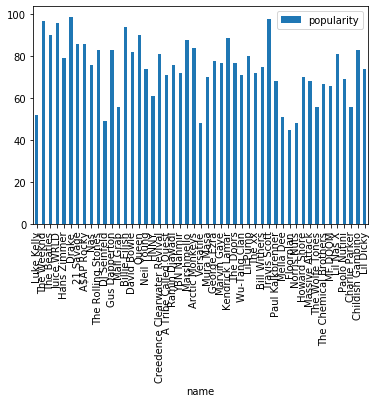

In [18]:
artists.plot(x ='name', y='popularity', kind = 'bar')

# Scrape Artist Ethnicity
https://ethnicelebs.com/

In [19]:
from bs4 import BeautifulSoup as bs4
import requests

### Scrape all paragraphs on page

In [124]:
def get_paragraph(artist_name):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'}
    base_url = "https://ethnicelebs.com/"
    
    # Parsed artists name
    parse_name = artist_name.replace(" ", "-")
    req = requests.get(base_url+parse_name, headers=headers)
    soup = bs4(req.content, "html.parser")

    # Find all <p> elements
    para = str(soup.find_all('p'))

    # Find range of string
    string_start = para.find("Ethnicity: ") + len("Ethnicity: ")
    string_end = para.find("</strong")
#     return string_start, string_end
    return 'Artist: '+artist_name+'\n Race: '+para[string_start:string_end]
    #"Artist: "+artist_name+"Race: "+

### Add favourite Spotify artists to list

In [125]:
# for artist in artists.name:
#     print(get_paragraph(artist))

    
get_paragraph("21 savage")
    

'Artist: 21 savage\n Race: Black British [possibly Dominican, Haitian, Saint Vincentian]'